In [1]:
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud
import math
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset from train_data.csv

In [2]:
data_f = pd.read_csv("../input/ford-sentence-classifiaction-dataset/train_data.csv")
data_f.head()

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill


In [3]:
data_f.rename(columns={'New_Sentence':'New_Sentence1', 'Type':'Type1'}, inplace=True)

# Removing Unnecessary columns from dataset

In [4]:
Total_data = data_f.drop(['Unnamed: 0','Sentence_id'],axis=1)
Total_data.head()

,New_Sentence1,Type1
0,Author and/or Review architecture/design and o...,Responsibility
1,Should be able to develop custom dynamic shape...,Responsibility
2,Experience in working crosslly with a larger ...,Requirement
3,"Previous business experience, including but no...",Skill
4,Delivering fast and right the first time.,SoftSkill


# Plotting Types and their Count

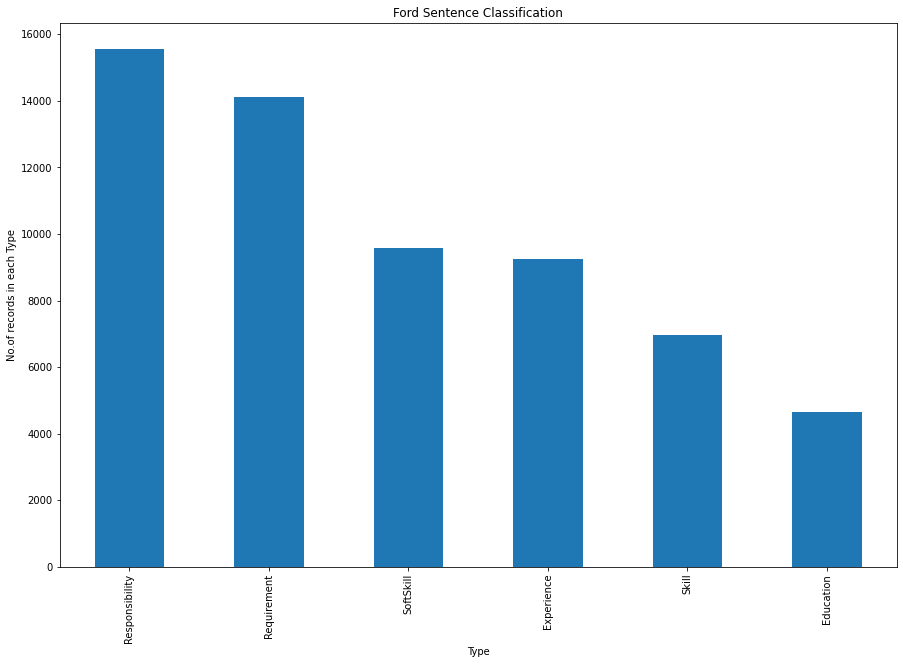

In [5]:
plt.figure(figsize=(15, 10))
plt.title('Ford Sentence Classification')
plt.xlabel('Type')
plt.ylabel('No.of records in each Type')
Total_data['Type1'].value_counts().plot(kind='bar')
plt.show()


#  Removing Punctuation from dataset

In [6]:
import string
def rm_punctuation(txt):
    txt_nopunct = "".join([str(x) for x in str(txt) if x not in string.punctuation])
    return txt_nopunct
Total_data['New_Sentence1'] = Total_data['New_Sentence1'].apply(lambda x: rm_punctuation(x))
Total_data.head()

,New_Sentence1,Type1
0,Author andor Review architecturedesign and oth...,Responsibility
1,Should be able to develop custom dynamic shape...,Responsibility
2,Experience in working crosslly with a larger ...,Requirement
3,Previous business experience including but not...,Skill
4,Delivering fast and right the first time,SoftSkill


# Splitting the data

In [7]:
split1 = int(0.8 * len(Total_data))
split2 = int(0.9 * len(Total_data))
train_data = Total_data[:split1]
dev_data = Total_data[split1:split2]
test_data = Total_data[split2:]

In [8]:
print(len(train_data))
train_data

48092


,New_Sentence1,Type1
0,Author andor Review architecturedesign and oth...,Responsibility
1,Should be able to develop custom dynamic shape...,Responsibility
2,Experience in working crosslly with a larger ...,Requirement
3,Previous business experience including but not...,Skill
4,Delivering fast and right the first time,SoftSkill
...,...,...
48087,Bachelors degree in an engineerng discipline ...,Education
48088,Experience in laboratory operations and runnin...,Requirement
48089,Bachelors Degree in Engineering Computer Scien...,Education
48090,Niet bang is om met zijn handen te werken,Requirement


In [9]:
print(len(test_data))
test_data

6012


,New_Sentence1,Type1
54103,Bachelors degree in Risk Management Finance In...,Requirement
54104,Strong Performance Testing and Engineering Lif...,Requirement
54105,Track Trace Business Development,Responsibility
54106,MUST HAVE6 months of experience operating Reac...,Experience
54107,YOU MUST HAVE 8 years experience familiarity...,Experience
...,...,...
60110,In this position you will utilize your progra...,Responsibility
60111,In addition this individual will be responsibl...,Responsibility
60112,Good problem solving skills,SoftSkill
60113,Good Excel knowledge,SoftSkill


In [10]:
print(len(dev_data))
dev_data

6011


,New_Sentence1,Type1
48092,Good analytical problem solving and decision ...,SoftSkill
48093,4 years of direct experience in database adm...,Experience
48094,Driving license,Requirement
48095,Credentials such as IFMA Facilities Managemen...,Education
48096,You will be joining a highly experienced grou...,Responsibility
...,...,...
54098,Build the frontend of applications through ap...,Responsibility
54099,Good understanding of evolving digital trends ...,SoftSkill
54100,Strong working knowledge of US and relevant i...,Requirement
54101,Must have 36 years of business to business se...,Experience


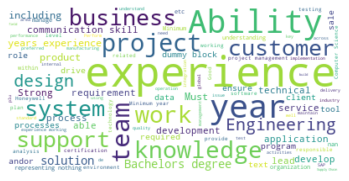

In [11]:
text = " ".join(str(item) for item in train_data.New_Sentence1)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

# Bulding Vocabulary List

In [12]:
# Vocabulary list
def build_vocabulary(input_data):
    vocabulary = []
    input_data = input_data.str.split()
    for txt in input_data:
        for words in txt:
            if len(words)>2:
                if words.isalpha() == True: # checking if the word contains only alphabets or not
                    vocabulary.append(words)
    return vocabulary

vocabulary_data = build_vocabulary(train_data['New_Sentence1'])

# frequency of words in the vocabulary list

In [13]:

def occurence(input_data):
    word_occurence = dict()
    
    for word in input_data:
        if word in word_occurence:
            word_occurence[word] += 1
        else:
            word_occurence[word] = 1
        
    return word_occurence

count_word = occurence(vocabulary_data)

# Removing words having frequency<5

In [14]:

vocabulary_list = []
for word in vocabulary_data:
    least=5
    if count_word[word] >= least:
        vocabulary_list.append(word)
        
# unique set of words from the vocabulary list
unique_vocab_list = list(set(vocabulary_list))

In [15]:
word_to_idx = dict()

for txt in unique_vocab_list:
    word_to_idx[word] = unique_vocab_list.index(word)

In [16]:
word_count_type = {uword: [0] * len(train_data['New_Sentence1']) for uword in unique_vocab_list}

for idx, typ in enumerate(train_data['New_Sentence1']):
    for txt in typ.split(' '):
        if txt in unique_vocab_list:
            word_count_type[txt][idx] += 1

# converting the word_counts_per_news vectors into a dataframe

In [17]:

# Reference: https://www.kdnuggets.com/2020/07/spam-filter-python-naive-bayes-scratch.html
word_counts = pd.DataFrame(word_count_type)
word_counts.head()

,Supports,Openshift,were,allow,adequately,Sie,Avoir,seniorlevel,readiness,comprehension,...,center,backgrounds,mixed,Web,timeframes,Laboratory,Framework,multiple,derive,conclusions
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# resetting the index to avoid redundancy
train_data.reset_index()
word_counts.reset_index()

,index,Supports,Openshift,were,allow,adequately,Sie,Avoir,seniorlevel,readiness,...,center,backgrounds,mixed,Web,timeframes,Laboratory,Framework,multiple,derive,conclusions
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48087,48087,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48088,48088,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48089,48089,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48090,48090,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# concatenating the train_data and word_counts data
processed_data = pd.concat([train_data, word_counts], axis=1)
processed_data.head()

,New_Sentence1,Type1,Supports,Openshift,were,allow,adequately,Sie,Avoir,seniorlevel,...,center,backgrounds,mixed,Web,timeframes,Laboratory,Framework,multiple,derive,conclusions
0,Author andor Review architecturedesign and oth...,Responsibility,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Should be able to develop custom dynamic shape...,Responsibility,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Experience in working crosslly with a larger ...,Requirement,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Previous business experience including but not...,Skill,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Delivering fast and right the first time,SoftSkill,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
processed_data.reset_index()

,index,New_Sentence1,Type1,Supports,Openshift,were,allow,adequately,Sie,Avoir,...,center,backgrounds,mixed,Web,timeframes,Laboratory,Framework,multiple,derive,conclusions
0,0,Author andor Review architecturedesign and oth...,Responsibility,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Should be able to develop custom dynamic shape...,Responsibility,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Experience in working crosslly with a larger ...,Requirement,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,Previous business experience including but not...,Skill,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Delivering fast and right the first time,SoftSkill,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48087,48087,Bachelors degree in an engineerng discipline ...,Education,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48088,48088,Experience in laboratory operations and runnin...,Requirement,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48089,48089,Bachelors Degree in Engineering Computer Scien...,Education,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48090,48090,Niet bang is om met zijn handen te werken,Requirement,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# probability of a word

In [21]:
# probability of a word
def probability(txt):
    sz_traindata = len(train_data)
    if txt in unique_vocab_list:
        occurence = count_word[txt]
    else:
        occurence = 0
    
    prob = occurence/sz_traindata
    
    return prob

In [22]:
probability('applications')

0.012559261415620061

# conditional probability

In [25]:

def cond_prob(txt, cond):
    category = train_data[train_data['Type1']==cond]
    size_cat = len(category)
    
    vocabulary = build_vocabulary(category['New_Sentence1'])
    occurence=0
    for word in vocabulary:
        if word == txt:
            occurence+=1
    
    prob_of_occu = occurence/size_cat
    
    return prob_of_occu

In [26]:
cond_prob('applications','Responsibility')

0.013232817387120057

In [27]:
cond_prob('application','Requirement')

0.013113592060960482

In [28]:
cond_prob('applications','SoftSkill')

0.0019579689335595873

In [29]:
cond_prob('applications','Education')

0.003472222222222222

In [30]:
cond_prob('applications','Experience')

0.022327469553450607

In [34]:
# helper function to get the parameters: probablity of occurance and conditional probabilities
# Reference: https://www.kdnuggets.com/2020/07/spam-filter-python-naive-bayes-scratch.html
def nbc(processed_data, alpha):
    
    res = processed_data[processed_data['Type1']=='Responsibility']
    req = processed_data[processed_data['Type1']=='Requirement']
    ssk = processed_data[processed_data['Type1']=='SoftSkill']
    sk = processed_data[processed_data['Type1']=='Skill']
    edu = processed_data[processed_data['Type1']=='Education']
    exp = processed_data[processed_data['Type1']=='Ecperience']


    # probability of Responsibility, Requirement, SoftSkill, Skill, EDucation, Experience
    prob_res = len(res)/len(processed_data)
    prob_req = len(req)/len(processed_data)
    prob_ssk = len(ssk)/len(processed_data)
    prob_sk = len(sk)/len(processed_data)
    prob_edu = len(edu)/len(processed_data)
    prob_exp = len(exp)/len(processed_data)    
   
    
    
    # number of words in Responsibility, Requirement, SoftSkill, Skill, EDucation, Experience
    no_res_words = res['Type1'].apply(len).sum()
    no_req_words = req['Type1'].apply(len).sum()
    no_ssk_words = ssk['Type1'].apply(len).sum()
    no_sk_words = sk['Type1'].apply(len).sum()
    no_edu_words = edu['Type1'].apply(len).sum()
    no_exp_words = exp['Type1'].apply(len).sum()
   

    
    # length of the vocabulary list
    size_vocab = len(unique_vocab_list)
    
    # Initiate parameters
    res_param = {txt:0 for txt in unique_vocab_list}
    req_param = {txt:0 for txt in unique_vocab_list}
    ssk_param = {txt:0 for txt in unique_vocab_list}
    sk_param = {txt:0 for txt in unique_vocab_list}
    edu_param = {txt:0 for txt in unique_vocab_list}
    exp_param = {txt:0 for txt in unique_vocab_list}
    
    # counting the frequency of each word in each Type
    for txt in unique_vocab_list:
        
        # word count in Responsibility
        word_occ_res = res[txt].sum()
        # probability of occurance of the word
        prob_word_res = (word_occ_res+alpha)/(no_res_words+alpha*size_vocab)
        # saving the probability
        res_param[txt] = prob_word_res

        # word count in Requirement
        word_occ_req = req[txt].sum()
        # probability of occurance of the word
        prob_word_req = (word_occ_req+alpha)/(no_req_words+alpha*size_vocab)
        # saving the probability
        req_param[txt] = prob_word_req
        
        # word count in SoftSkill
        word_occ_ssk = ssk[txt].sum()
        # probability of occurance of the word
        prob_word_ssk = (word_occ_ssk+alpha)/(no_ssk_words+alpha*size_vocab)
        # saving the probability
        ssk_param[txt] = prob_word_ssk
        
        # word count in Skill
        word_occ_sk = sk[txt].sum()
        # probability of occurance of the word
        prob_word_sk = (word_occ_sk+alpha)/(no_sk_words+alpha*size_vocab)
        # saving the probability
        sk_param[txt] = prob_word_sk
        
        # word count in Responsibility
        word_occ_edu = edu[txt].sum()
        # probability of occurance of the word
        prob_word_edu = (word_occ_edu+alpha)/(no_edu_words+alpha*size_vocab)
        # saving the probability
        edu_param[txt] = prob_word_edu
        
        # word count in Responsibility
        word_occ_exp = exp[txt].sum()
        # probability of occurance of the word
        prob_word_exp = (word_occ_exp+alpha)/(no_exp_words+alpha*size_vocab)
        # saving the probability
        exp_param[txt] = prob_word_exp
       
        
    
    return prob_res,prob_req,prob_ssk,prob_sk,prob_edu,prob_exp,res_param,req_param,ssk_param,sk_param,edu_param,exp_param

#  helper function to test the classifier

In [41]:
# helper function to test the classifier
# Reference: https://www.kdnuggets.com/2020/07/spam-filter-python-naive-bayes-scratch.html

def Type_Prediction(sentence):
    sentence = re.sub('\W', ' ', sentence)
    sentence = sentence.lower().split()
    
    # probability of each type in the dataset
    prob_res_given_sentence = prob_res
    prob_req_given_sentence = prob_req
    prob_ssk_given_sentence = prob_ssk
    prob_sk_given_sentence = prob_sk
    prob_edu_given_sentence = prob_edu
    prob_exp_given_sentence = prob_exp
    
    
    # dictionary to store the probability values of the Sentence
    types = dict()
    
    # calculating the probability of occurance each word in each category
    for txt in sentence:
        if txt in res_param:
            prob_res_given_sentence = prob_res_given_sentence*res_param[txt]
            
        if txt in req_param:
            prob_req_given_sentence = prob_req_given_sentence*req_param[txt]
            
        if txt in ssk_param:
            prob_ssk_given_sentence = prob_ssk_given_sentence*ssk_param[txt]
            
        if txt in sk_param:
            prob_sk_given_sentence = prob_sk_given_sentence*sk_param[txt]
            
        if txt in edu_param:
            prob_edu_given_sentence = prob_edu_given_sentence*edu_param[txt]
            
        if txt in exp_param:
            prob_exp_given_sentence = prob_exp_given_sentence*exp_param[txt]
            
            
    
    types['Responsibility'] = prob_res_given_sentence
    types['Requirement'] = prob_req_given_sentence
    types['SoftSkill'] = prob_ssk_given_sentence
    types['Skill'] = prob_sk_given_sentence
    types['Education'] = prob_edu_given_sentence
    types['Experience'] = prob_exp_given_sentence
    
    # category containing the highest probability
    predicted_types = max(types, key=types.get)
    
    return predicted_types

In [44]:
# calling the Naive Bayes Classifier function to get the parameters without smoothing
prob_res,prob_req,prob_ssk,prob_sk,prob_edu,prob_exp,res_param,req_param,ssk_param,sk_param,edu_param,exp_param = nbc(processed_data, 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in long_scalars


In [45]:
# calling the news_category_prediction function and saving the predictions
dev_data['predicted'] = dev_data['New_Sentence1'].apply(Type_Prediction)
dev_data.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,New_Sentence1,Type1,predicted
48092,Good analytical problem solving and decision ...,SoftSkill,SoftSkill
48093,4 years of direct experience in database adm...,Experience,Skill
48094,Driving license,Requirement,Requirement
48095,Credentials such as IFMA Facilities Managemen...,Education,Education
48096,You will be joining a highly experienced grou...,Responsibility,Skill


# Accuracy of the model using dev data

In [47]:
# Reference:https://www.kdnuggets.com/2020/07/spam-filter-python-naive-bayes-scratch.html
def accuracy(txt):
    actual = 0
    size_data = txt.shape[0]

    for row in txt.iterrows():
        row = row[1]
        if row['Type1'] == row['predicted']:
            actual += 1
            
    accuracy = actual/size_data
    
    return accuracy

print('Accuracy:', accuracy(dev_data))

Accuracy: 0.5005822658459491


# Accuracy Test after Smoothing

In [50]:
# calling the Naive Bayes Classifier function to get the parameters without smoothing
prob_res,prob_req,prob_ssk,prob_sk,prob_edu,prob_exp,res_param,req_param,ssk_param,sk_param,edu_param,exp_param = nbc(processed_data, 0.001)
dev_data['predicted'] = dev_data['New_Sentence1'].apply(Type_Prediction)

print('Accuracy after smoothing: ', accuracy(dev_data))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy after smoothing:  0.5030776909000166


# Accuracy of the model using test_data

In [52]:

prob_res,prob_req,prob_ssk,prob_sk,prob_edu,prob_exp,res_param,req_param,ssk_param,sk_param,edu_param,exp_param = nbc(processed_data, 0.001)
test_data['predicted'] = test_data['New_Sentence1'].apply(Type_Prediction)

print('Accuracy of Test data: ', accuracy(dev_data))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Accuracy of Test data:  0.5030776909000166
